(ai:ul:ica-pca:example-2d)=
# FastICA on 2D point clouds

Esempio disponibile sul sito di [scikit-learn](https://scikit-learn.org/dev/auto_examples/decomposition/plot_ica_vs_pca.html#sphx-glr-auto-examples-decomposition-plot-ica-vs-pca-py).

## Librerie e funzioni di comodo

### Import librerie

In [1]:
%reset -f

import numpy as np
from sklearn.decomposition import PCA, FastICA

import matplotlib.pyplot as plt


### Funzioni utili


In [2]:
### utils

def plot_samples(S, axis_list=None):
    """ util function for plotting scatter plots """
    plt.scatter(
        S[:,0], S[:,1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            x_axis, y_axis = axis / axis.std()
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -3, 3, color="black", linewidth=0.5)
    plt.vlines(0, -3, 3, color="black", linewidth=0.5)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.gca().set_aspect("equal")
    plt.xlabel("x")
    plt.ylabel("y")

## Generazione campione

La formulazione più comune dei metodi usa l'espressione

$$\mathbf{X} = \mathbf{A} \, \mathbf{S} \ ,$$

che lega osservazioni $X$ e segnali $S$ tramite la matrice di mixing $A$. Per le strutture dati di Python, è conveniente (**todo** *provare! O è dovuto solo alla forma mentis di chi usa Python?*) scrivere la relazione trasposta,

$$\mathbf{X}^T = \mathbf{S}^T \, \mathbf{A}^T \ .$$


Text(0.5, 1.0, 'Observations, X = A S')

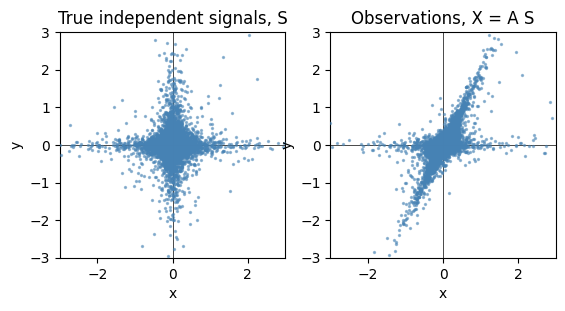

In [3]:

#> Sample data generation
# Initialize a default random number generator
rng = np.random.default_rng(42)
# rng = np.random.RandomState(42)   
# np.random.RandomState() is deprecated! Use random.default_rng(),
# but FastICA needs a np.random.RandomSstate as an optional input random_state

# Create data: non-isotropic mixing of 2 t-Student variables:
# 1. Create signals S, as 2 t-Student distributions
# 1. sampling from a t-Student distribution with degrees of freedom df
# matrix S has dimensions (n_rows, n_cols) = (n_samples, n_dim), interpreting
# each row as a sample, and each row as a dimension of the data
df, n_samples, n_dims = 1.5, 10000, 2
S = rng.standard_t(df, size=(n_samples, n_dims))

# 2. scale one component
S[0,:] *= 2.0
plt.subplot(1, 2, 1)
plot_samples(S / S.std())
plt.title("True independent signals, S")

# 3. Mix components
A = np.array([[1, 1], [0, 2]])  # Mixing matrix
X = np.dot(S, A.T)              # Generate observations

plt.subplot(1, 2, 2)
plot_samples(X / X.std())
plt.title("Observations, X = A S")


## ICA e PCA

In [4]:
#> PCA
pca = PCA()
S_pca_ = pca.fit(X).transform(X)

#> ICA
ica = FastICA(random_state=3, whiten="arbitrary-variance")
# ica = FastICA(random_state=np.random.RandomState(42), whiten="arbitrary-variance")
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources


## Risultati

In [5]:
#> Print results:
# Normalization: principal and independent components are usually defined up to a multiplicative factor;
# PCA and ICA provides information abouth the "shape" of the main components in a signal; usually, it's a
# good practice to have normalized info/results, that contains only shape info and no other arbitrary (non)-info
# - PCA results are usually normalized
# - ICA results seem to be not normalized by the algorithm; easy to perform normalization, as done below,
#   to have unit-norm vectors to be easily compared with PCA.
#   If normalization done outside functions, remember to normalize both signals and mixing matrix

print("\nPCA, principal components (rows of the matrix)")
print(pca.components_ )
print("\nICA. indepdent components (rows of the matrix)")
print(ica.mixing_.T)                                                        # non normalized
# print(ica.mixing_.T / np.linalg.norm(ica.mixing_.T,axis=1)[:, np.newaxis])  # normalized
print()


PCA, principal components (rows of the matrix)
[[-0.48647086 -0.8736968 ]
 [ 0.8736968  -0.48647086]]

ICA. indepdent components (rows of the matrix)
[[-9.46908181e+02 -1.89462935e+03]
 [ 6.85936578e+02 -8.07940837e-01]]



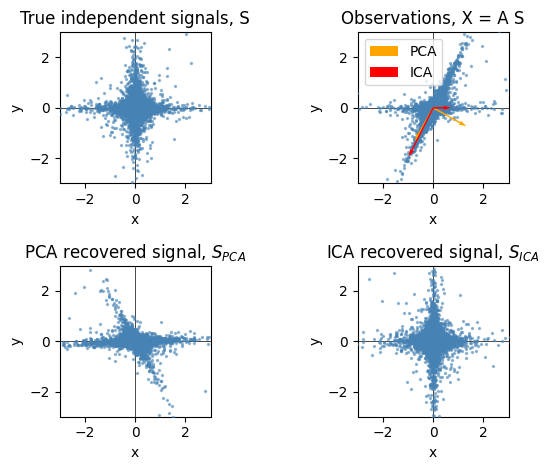

In [6]:
#> Plots
plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title("True independent signals, S")

axis_list = [(pca.components_.T, "orange", "PCA"), (ica.mixing_, "red", "ICA")]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(loc="upper left")
legend.set_zorder(100)

plt.title("Observations, X = A S")

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_))
plt.title("PCA recovered signal, $S_{PCA}$")

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title("ICA recovered signal, $S_{ICA}$")

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.tight_layout()
plt.show()